In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import tensorflow as tf     
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn import metrics
from skimage.feature import hog

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


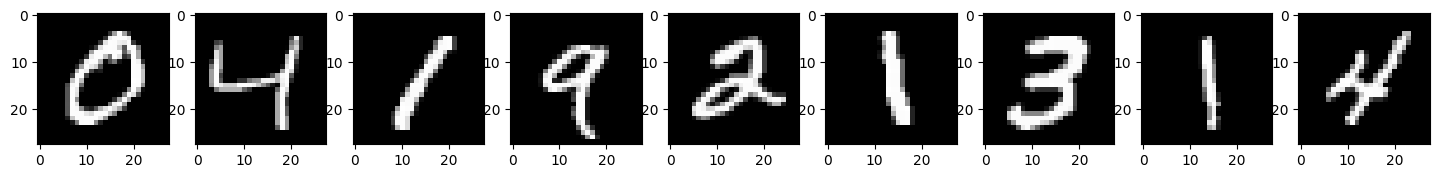

In [4]:
plt.figure(figsize=(20, 2))
for i in range(1, 10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [341]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [126]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [365]:
optimizer = tf.keras.optimizers.Adam(lr=0.2)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_50 (Flatten)        (None, 784)               0         
                                                                 
 dense_140 (Dense)           (None, 1024)              803840    
                                                                 
 dropout_26 (Dropout)        (None, 1024)              0         
                                                                 
 dense_141 (Dense)           (None, 512)               524800    
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_142 (Dense)           (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
N

In [366]:
reduceLearningRate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.999, patience=1, min_lr=0.0001)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', restore_best_weights = True)

# Train model with .fit function
history = model.fit(
    # Pass train_data and train_labels (the pre-process data saved before)
    x_train,
    y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=100,
    shuffle= True,
    # callbacks=[reduceLearningRate]
)
# model.save(r'/content/drive/MyDrive/Machine Learning/ANN_MNIST/Model/test.h5')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


96/96 [==============================] - 2s 6ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.2806 - val_accuracy: 0.9753
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.3220 - val_accuracy: 0.9745
Epoch 3/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 0.9983 - val_loss: 0.2862 - val_accuracy: 0.9746
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.2777 - val_accuracy: 0.9750
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.2984 - val_accuracy: 0.9746
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.3059 - val_accuracy: 0.9738
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.2889 - val_accuracy: 0.9743
Epoch 8/100
96/96 [======

In [360]:
predictions = model.predict(x_test)
actual = y_test
print(metrics.accuracy_score(actual, np.argmax(predictions, axis = 1)))

313/313 [==============================] - 1s 2ms/step
0.9776


In [ ]:
print(metrics.classification_report(actual, np.argmax(predictions, axis = 1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

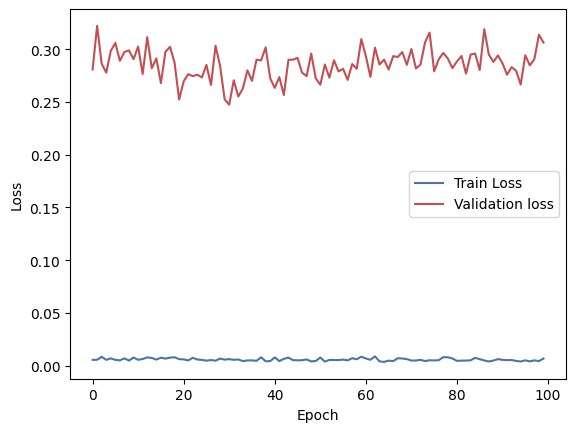

In [367]:
plt.plot(history.history["loss"], 'b', label="Train Loss")
plt.plot(history.history["val_loss"], 'r', label="Validation loss")
plt.axis([0, 25, 0, 0.5])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.style.use('default')

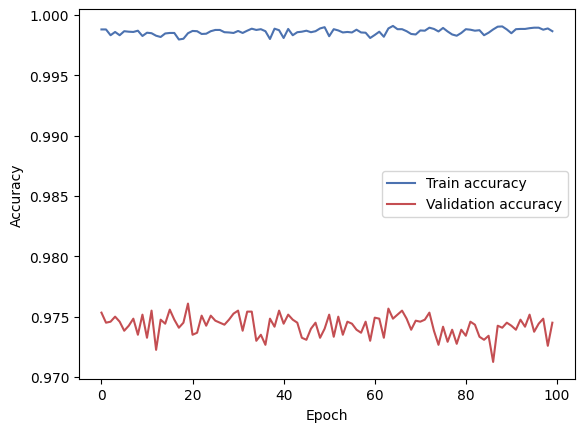

In [368]:
plt.plot(history.history["accuracy"], 'b', label="Train accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="Validation accuracy")
plt.axis([0, 25, 0.85, 1])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.style.use('default')

313/313 [==============================] - 1s 2ms/step


<Axes: xlabel='Predict', ylabel='Actual'>

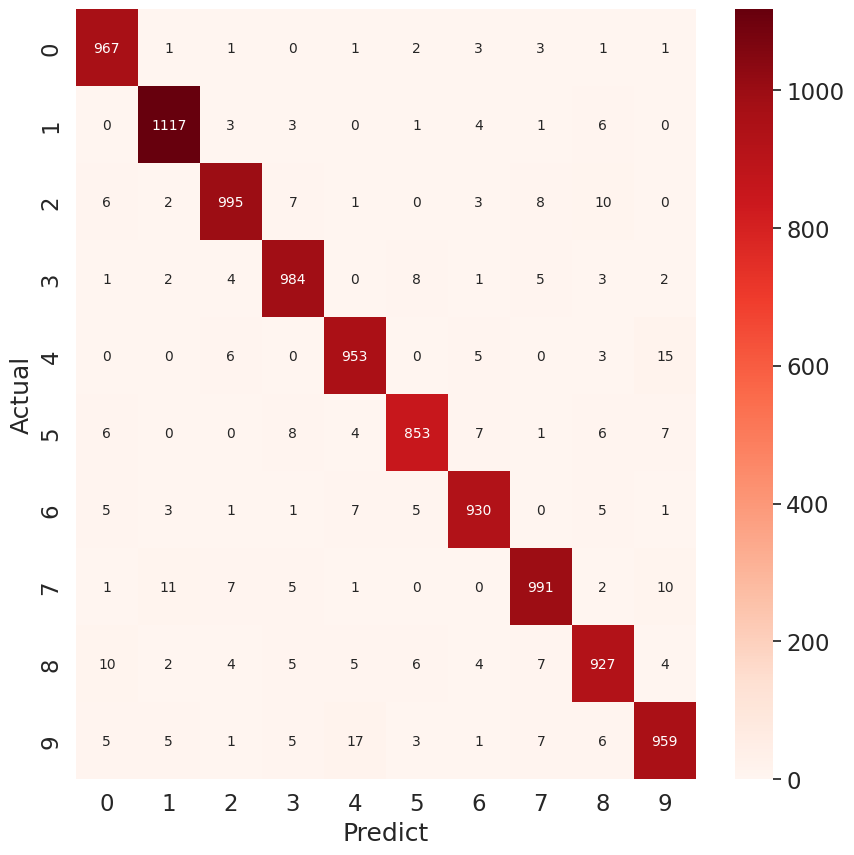

In [172]:
## Pass testLabels and predictions to confusion matrix
matrix = metrics.confusion_matrix(
    actual,
    np.argmax(predictions, axis = 1)
)
## Plot confusion matrix with matplotlib
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

DataFrameMatrix = pd.DataFrame(matrix, columns=np.unique(labels), index = np.unique(labels))
DataFrameMatrix.index.name = 'Actual'
DataFrameMatrix.columns.name = 'Predict'
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5) 
sn.heatmap(DataFrameMatrix, cmap="Reds", annot=True, annot_kws={"size": 10}, fmt="d")